# Autoregressive Integrated Moving Average

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from datetime import datetime

In [26]:
data = pd.read_csv('ALL_MONTHS_FINAL.csv')
print(data.head())
print("\nData Types: ")
print(data.dtypes)

   Unnamed: 0               period  Year  Month  Day  Hour      AP    C6  \
0           0  2016-01-01 00:00:00  2016      1    1     0  953.25  0.46   
1           1  2016-01-01 01:00:00  2016      1    1     1  952.98  0.27   
2           2  2016-01-01 02:00:00  2016      1    1     2  952.69  0.14   
3           3  2016-01-01 03:00:00  2016      1    1     3  952.45  0.17   
4           4  2016-01-01 04:00:00  2016      1    1     4  952.43  0.12   

     CO     NO  ...    PM25   RF     RH     RT    SO2    SR   TOL     WD  \
0  1.51  20.11  ...   75.25  0.0  58.18  17.72  40.58  0.11  3.23  16.39   
1  1.22  20.50  ...  101.77  0.0  61.08  16.91  40.46  0.02  2.18  16.33   
2  1.05  20.89  ...   83.33  0.0  62.52  16.43  38.97  0.01  1.65  16.30   
3  0.98  21.09  ...   61.98  0.0  64.72  15.66  39.07  0.00  1.30  16.25   
4  0.93  21.21  ...   69.20  0.0  68.06  14.93  39.65  0.00  1.15  16.23   

     WS   XYL  
0  0.41  2.35  
1  0.53  1.53  
2  0.45  1.08  
3  0.29  0.76  
4  0.2

In [27]:
data.drop('Unnamed: 0',axis = 1, inplace = True)

In [28]:
data.head()

,period,Year,Month,Day,Hour,AP,C6,CO,NO,NO2,...,PM25,RF,RH,RT,SO2,SR,TOL,WD,WS,XYL
0,2016-01-01 00:00:00,2016,1,1,0,953.25,0.46,1.51,20.11,68.99,...,75.25,0.0,58.18,17.72,40.58,0.11,3.23,16.39,0.41,2.35
1,2016-01-01 01:00:00,2016,1,1,1,952.98,0.27,1.22,20.50,68.79,...,101.77,0.0,61.08,16.91,40.46,0.02,2.18,16.33,0.53,1.53
2,2016-01-01 02:00:00,2016,1,1,2,952.69,0.14,1.05,20.89,66.25,...,83.33,0.0,62.52,16.43,38.97,0.01,1.65,16.30,0.45,1.08
3,2016-01-01 03:00:00,2016,1,1,3,952.45,0.17,0.98,21.09,66.43,...,61.98,0.0,64.72,15.66,39.07,0.00,1.30,16.25,0.29,0.76
4,2016-01-01 04:00:00,2016,1,1,4,952.43,0.12,0.93,21.21,67.40,...,69.20,0.0,68.06,14.93,39.65,0.00,1.15,16.23,0.28,0.60


In [29]:
data = data.set_index('period')

In [30]:
data.head()

,Year,Month,Day,Hour,AP,C6,CO,NO,NO2,NOX,...,PM25,RF,RH,RT,SO2,SR,TOL,WD,WS,XYL
period,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2016,1,1,0,953.25,0.46,1.51,20.11,68.99,89.10,...,75.25,0.0,58.18,17.72,40.58,0.11,3.23,16.39,0.41,2.35
2016-01-01 01:00:00,2016,1,1,1,952.98,0.27,1.22,20.50,68.79,89.29,...,101.77,0.0,61.08,16.91,40.46,0.02,2.18,16.33,0.53,1.53
2016-01-01 02:00:00,2016,1,1,2,952.69,0.14,1.05,20.89,66.25,87.13,...,83.33,0.0,62.52,16.43,38.97,0.01,1.65,16.30,0.45,1.08
2016-01-01 03:00:00,2016,1,1,3,952.45,0.17,0.98,21.09,66.43,87.51,...,61.98,0.0,64.72,15.66,39.07,0.00,1.30,16.25,0.29,0.76
2016-01-01 04:00:00,2016,1,1,4,952.43,0.12,0.93,21.21,67.40,88.61,...,69.20,0.0,68.06,14.93,39.65,0.00,1.15,16.23,0.28,0.60


# Giving all the months a seperate variable

In [31]:
JAN = data.iloc[:744,:]
FEB = data.iloc[744:1440,:]
MAR = data.iloc[1440:2184,:]
APR = data.iloc[2184:2904,:]
MAY = data.iloc[2904:3648,:]
JUN = data.iloc[3648:4368,:]
JUL = data.iloc[4368:5112,:]
AUG = data.iloc[5112:5856,:]
SEP = data.iloc[5856:6576,:]
OCT = data.iloc[6576:7320,:]
NOV = data.iloc[7320:8040,:]
DEC = data.iloc[8040:8784,:]

# Following is a function that will apply the dickey fuller test for stationarity of our data

In [32]:
from statsmodels.tsa.stattools import adfuller
def teststationarity(timeseries):
    
    #determining rolling stats
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    #print(rolmean)
    #print(rolstd)
    
    #plotting rolling mean data
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling standard')
    plt.legend(loc = 'best')
    plt.title("Rolling mean")
    plt.xticks(np.arange(0, 744, 120.0))
    plt.show(block = False)
    
    #applying dickey fuller test
    print("Results of Dickey Fuller Test: ")
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
#teststationarity(ts)

In [33]:
rough_set = JAN

# We try to observe a pattern in one of the parameters in our dataset

In [34]:
jan_ap = rough_set.loc[:,['PM10']]
jan_ap.head()

,PM10
period,
2016-01-01 00:00:00,112.21
2016-01-01 01:00:00,119.91
2016-01-01 02:00:00,103.12
2016-01-01 03:00:00,92.37
2016-01-01 04:00:00,86.86


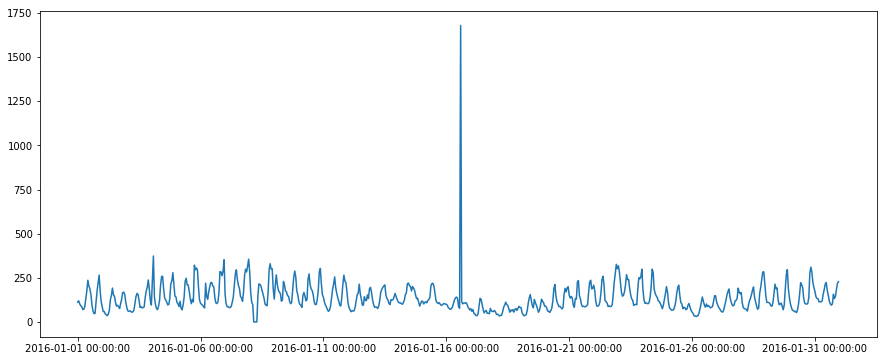

In [37]:
plt.plot(jan_ap)
plt.xticks(np.arange(0, 744, 120.0))
plt.show()

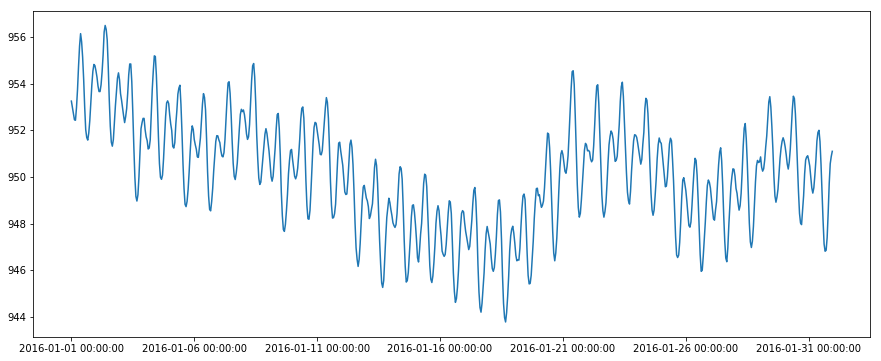

In [16]:
jan_ap_log = np.log(jan_ap)
plt.plot(jan_ap)
plt.xticks(np.arange(0, 744, 120.0))
plt.show()

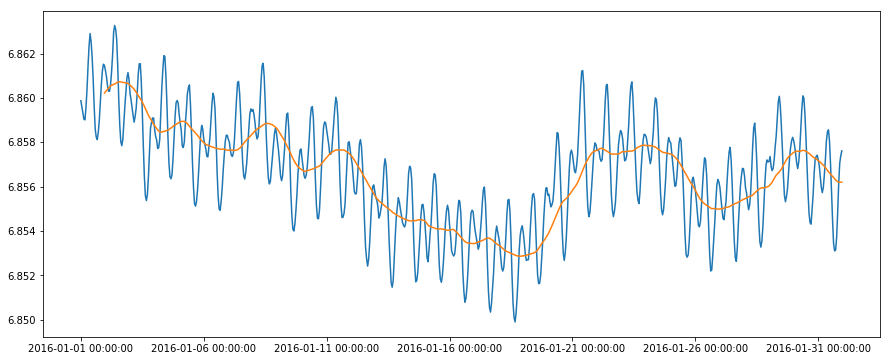

In [17]:
moving_avg = jan_ap_log.rolling(24).mean()
plt.plot(jan_ap_log)
plt.plot(moving_avg)
plt.xticks(np.arange(0, 744, 120.0))
plt.show()

In [18]:
jan_ap_log_ma_diff = jan_ap_log - moving_avg
jan_ap_log_ma_diff.head(24)

,AP
period,
2016-01-01 00:00:00,NaN
2016-01-01 01:00:00,NaN
2016-01-01 02:00:00,NaN
2016-01-01 03:00:00,NaN
2016-01-01 04:00:00,NaN
2016-01-01 05:00:00,NaN
2016-01-01 06:00:00,NaN
2016-01-01 07:00:00,NaN
2016-01-01 08:00:00,NaN


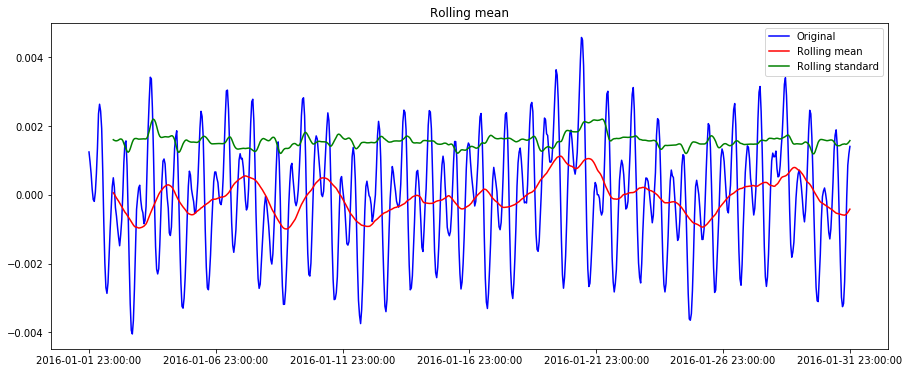

Results of Dickey Fuller Test: 
Test Statistic                  -2.175064
p-value                          0.215420
#Lags Used                      19.000000
Number of Observations Used    701.000000
Critical Value (1%)             -3.439713
Critical Value (5%)             -2.865672
Critical Value (10%)            -2.568970
dtype: float64


In [20]:
jan_ap_log_ma_diff.dropna(inplace=True)
teststationarity(jan_ap_log_ma_diff['AP'])

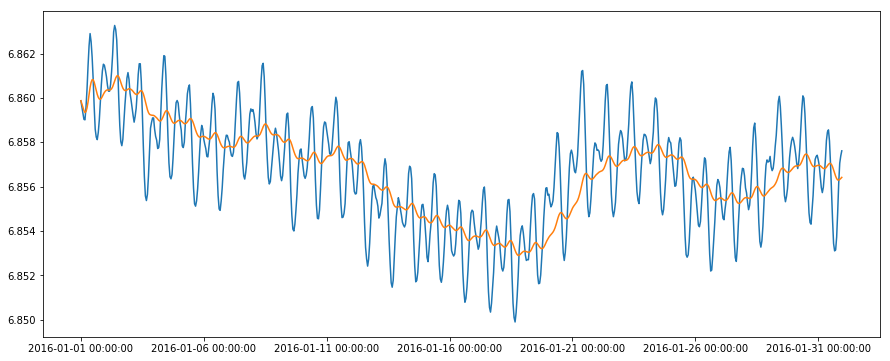

In [25]:
jan_ap_ewma = jan_ap_log.ewm(24).mean()
plt.plot(jan_ap_log)
plt.plot(jan_ap_ewma)
plt.xticks(np.arange(0, 744, 120.0))
plt.show()

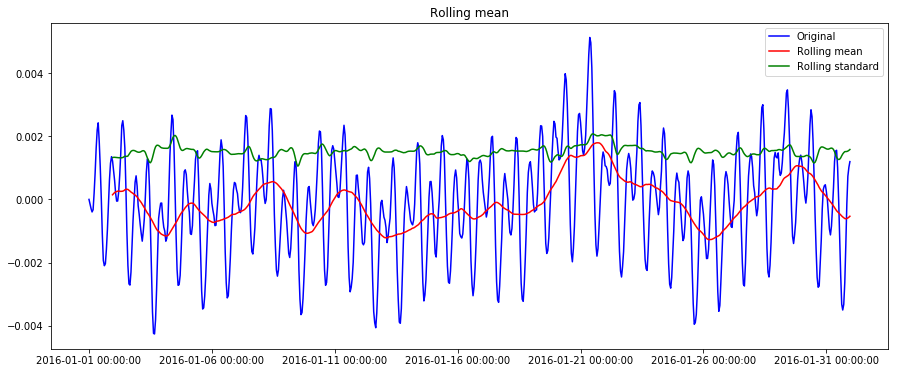

Results of Dickey Fuller Test: 
Test Statistic                  -1.555446
p-value                          0.505927
#Lags Used                      19.000000
Number of Observations Used    724.000000
Critical Value (1%)             -3.439414
Critical Value (5%)             -2.865540
Critical Value (10%)            -2.568900
dtype: float64


In [26]:
jan_ap_log_ewmadiff = jan_ap_log - jan_ap_ewma
teststationarity(jan_ap_log_ewmadiff['AP'])

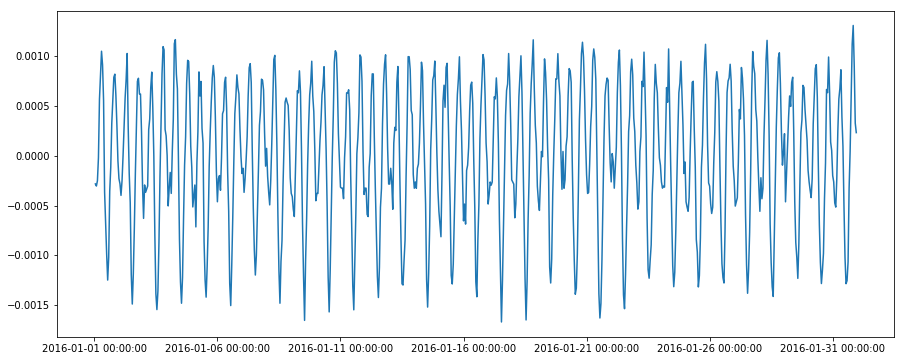

In [27]:
jan_ap_log_shift = jan_ap_log - jan_ap_log.shift()
plt.plot(jan_ap_log_shift)
plt.xticks(np.arange(0, 744, 120.0))
plt.show()

# Best result

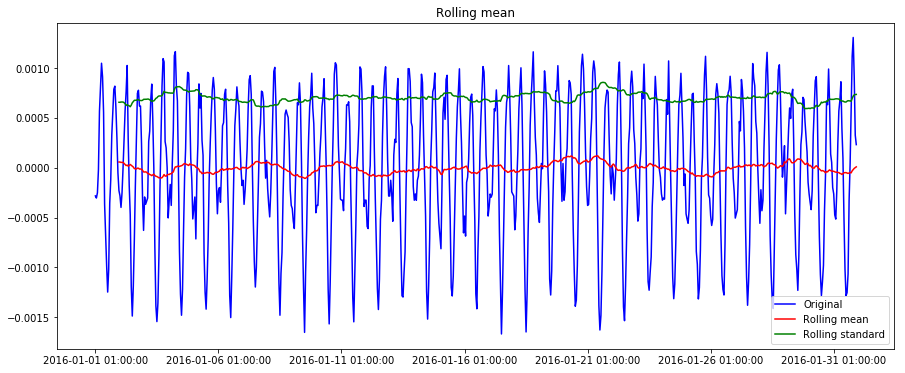

Results of Dickey Fuller Test: 
Test Statistic                -9.587677e+00
p-value                        2.076111e-16
#Lags Used                     2.000000e+01
Number of Observations Used    7.220000e+02
Critical Value (1%)           -3.439440e+00
Critical Value (5%)           -2.865551e+00
Critical Value (10%)          -2.568906e+00
dtype: float64


In [28]:
jan_ap_log_shift.dropna(inplace=True)
teststationarity(jan_ap_log_shift['AP'])

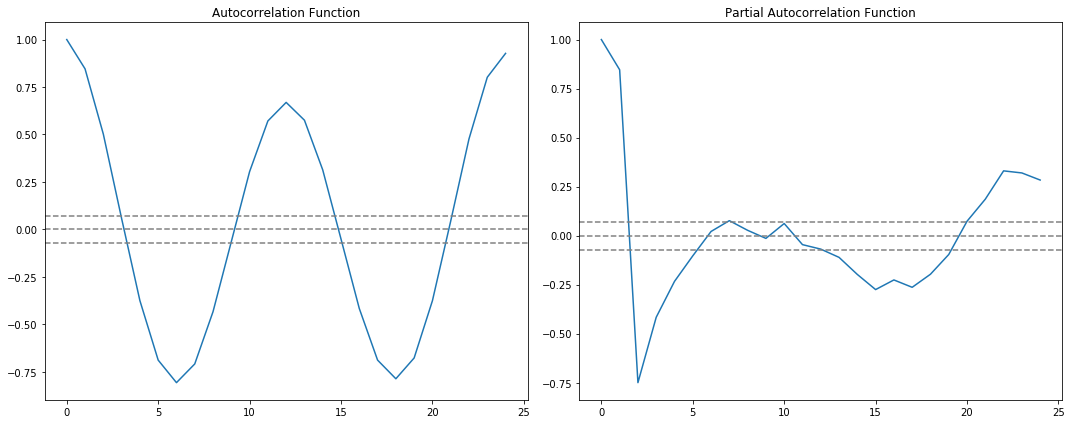

In [29]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(jan_ap_log_shift, nlags = 24)
lag_pacf = pacf(jan_ap_log_shift, nlags = 24, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(jan_ap_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(jan_ap_log_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(jan_ap_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(jan_ap_log_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [50]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(jan_ap_log, order=(3, 1, 1))  
results_ARIMA = model.fit(disp=-1) 

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


([<matplotlib.axis.XTick at 0x1f180cf0b38>,
 <a list of 7 Text xticklabel objects>)

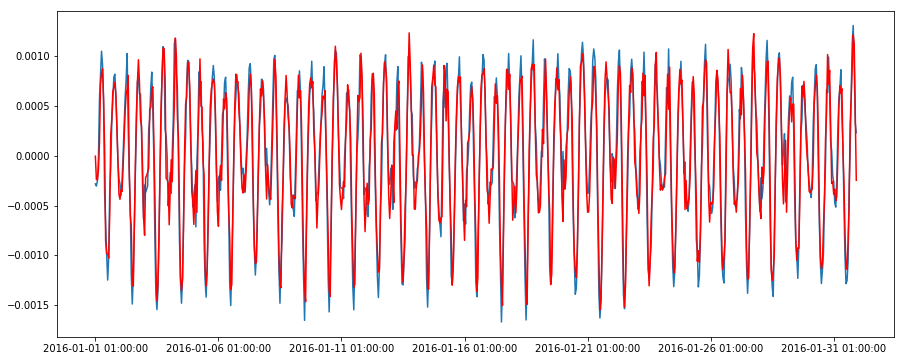

In [51]:
plt.plot(jan_ap_log_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.xticks(np.arange(0, 744, 120.0))
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-jan_ap_log_shift)**2))

In [52]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

period
2016-01-01 01:00:00   -0.000005
2016-01-01 02:00:00   -0.000240
2016-01-01 03:00:00   -0.000239
2016-01-01 04:00:00   -0.000137
2016-01-01 05:00:00    0.000127
dtype: float64


In [53]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

period
2016-01-01 01:00:00   -0.000005
2016-01-01 02:00:00   -0.000246
2016-01-01 03:00:00   -0.000485
2016-01-01 04:00:00   -0.000622
2016-01-01 05:00:00   -0.000495
dtype: float64


In [54]:
#jan_ap_log.iloc[0] = 6.859877
predictions_ARIMA_log = pd.Series(6.859877, index=jan_ap_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

period
2016-01-01 00:00:00    6.859877
2016-01-01 01:00:00    6.859872
2016-01-01 02:00:00    6.859631
2016-01-01 03:00:00    6.859392
2016-01-01 04:00:00    6.859255
dtype: float64

TypeError: unsupported operand type(s) for +: 'int' and 'str'

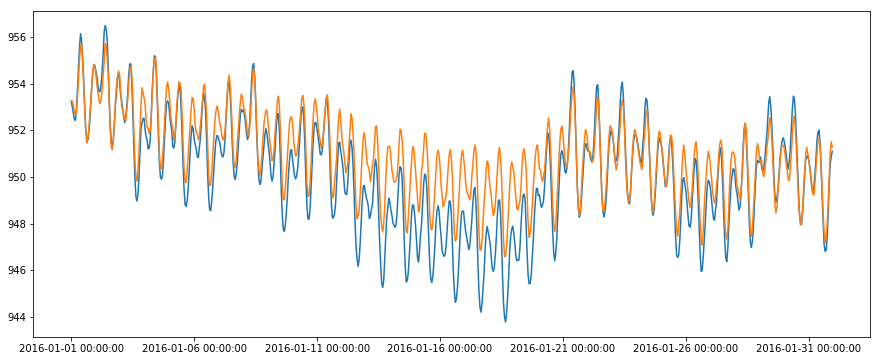

In [55]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(jan_ap)
plt.plot(predictions_ARIMA)
plt.xticks(np.arange(0, 744, 120.0))
plt.title('RMSE: {%.4f}'.format(np.sqrt(sum((predictions_ARIMA-jan_ap)**2)/len(jan_ap))))

In [ ]:
predictions_ARIMA